In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import keras
import tensorflow.keras.utils as utils

In [ ]:
dir_train = '/content/drive/MyDrive/dataset/soybeans/train'
dir_test = '/content/drive/MyDrive/dataset/soybeans/test'


In [ ]:
data_generator = ImageDataGenerator(
    rescale = 1/255.0)

# || Utilizando a biblioteca flow_from_directory

In [ ]:
gerador_treino = data_generator.flow_from_directory(
    dir_train, 
    batch_size= 32,
    target_size=(224,224),
    class_mode= 'sparse')

Found 15336 images belonging to 4 classes.


In [ ]:
gerador_treino.class_indices

{'broadleaf': 0, 'grass': 1, 'soil': 2, 'soybean': 3}

In [ ]:
gerador_teste = data_generator.flow_from_directory(
    dir_test, 
    batch_size= 32,
    target_size=(224,224),
    class_mode= 'sparse')

Found 4345 images belonging to 4 classes.


In [ ]:
print(len(gerador_treino))
print(len(gerador_teste))

480
136


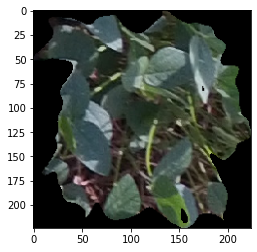

In [ ]:
plt.imshow(gerador_treino[32][0][10])

In [ ]:
gerador_treino[30][1]


array([3., 1., 3., 3., 3., 3., 3., 3., 1., 2., 3., 3., 2., 2., 2., 3., 3.,
       3., 2., 2., 3., 3., 1., 3., 2., 3., 3., 3., 0., 2., 3., 3.],
      dtype=float32)

Obtendo um modelo de rede neural()

In [ ]:
model = tf.keras.applications.Xception(input_shape=(244,244,3), include_top=False, classes=4)


In [ ]:
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(model.output)

In [ ]:
from tensorflow.python.keras.backend import softmax
hidden = tf.keras.layers.Dense(2048, activation='relu')(average_pooling)

In [ ]:
pred = tf.keras.layers.Dense(1, activation='softmax')(hidden)
#pred = tf.keras.layers.Softmax(axis=-1)(hidden)

#pred = tf.keras.activations.softmax(hidden, axis=-1)

In [ ]:
model_final = tf.keras.models.Model(inputs=model.input, outputs=pred )

In [ ]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 121, 121, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 121, 121, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_final.fit(gerador_treino, epochs=5)

Epoch 1/5
480/480 [==============================] - 2251s 5s/step - loss: -805718.0000 - accuracy: 0.2295
Epoch 2/5
480/480 [==============================] - 306s 638ms/step - loss: -12055371.0000 - accuracy: 0.2295
Epoch 3/5
480/480 [==============================] - 305s 636ms/step - loss: -49632464.0000 - accuracy: 0.2295
Epoch 4/5
480/480 [==============================] - 306s 636ms/step - loss: -126250016.0000 - accuracy: 0.2295
Epoch 5/5
480/480 [==============================] - 305s 635ms/step - loss: -259966912.0000 - accuracy: 0.2295


In [ ]:
model_final.evaluate(gerador_teste)

136/136 [==============================] - 619s 5s/step - loss: -421708384.0000 - accuracy: 0.1620


[-421708384.0, 0.1620253175497055]